# Εισαγωγή Δεδομένων

In [1]:
df <- read.table('salaries.csv', sep=",", header=T)

In [2]:
print(head(df))

  Exp Salary
1   1  45000
2   2  50000
3   3  60000
4   4 170000
5   5 400000
6   6 280000


# Αναλυση Δεδομένων

In [3]:
# έλεγχος για τιμές που απουσιάζουν με την συνάρτηση is.na()
missing_values <- is.na(df)

# Display the result
print(missing_values)

        Exp Salary
 [1,] FALSE  FALSE
 [2,] FALSE  FALSE
 [3,] FALSE  FALSE
 [4,] FALSE  FALSE
 [5,] FALSE  FALSE
 [6,] FALSE  FALSE
 [7,] FALSE  FALSE
 [8,] FALSE  FALSE
 [9,] FALSE  FALSE
[10,] FALSE  FALSE
[11,] FALSE  FALSE
[12,] FALSE  FALSE
[13,] FALSE   TRUE


In [4]:
# έλεγχος για τιμές που απουσιάζουν με την συνάρτηση is.na() & colSums()
missing_values_count <- colSums(is.na(df))

# Display the result
print(missing_values_count)

   Exp Salary 
     0      1 


In [5]:
df<-na.omit(df)

In [6]:
# έλεγχος για τιμές που απουσιάζουν με την συνάρτηση is.na()
missing_values <- is.na(df)

# Display the result
print(missing_values)

     Exp Salary
1  FALSE  FALSE
2  FALSE  FALSE
3  FALSE  FALSE
4  FALSE  FALSE
5  FALSE  FALSE
6  FALSE  FALSE
7  FALSE  FALSE
8  FALSE  FALSE
9  FALSE  FALSE
10 FALSE  FALSE
11 FALSE  FALSE
12 FALSE  FALSE


In [7]:
# έλεγχος της συσχέτισης των δεδομένων με την συναρτηση cor()
correlation_matrix <- cor(df, use = "complete.obs")

print(correlation_matrix)

             Exp    Salary
Exp    1.0000000 0.9429595
Salary 0.9429595 1.0000000


In [8]:
# εμφάνιση συγκεντρωτικών στατιστικών ανά μεταβλητή με την συνάρτηση summary()
summary_statistics <- summary(df)

print(summary_statistics)

      Exp             Salary       
 Min.   : 1.000   Min.   :  45000  
 1st Qu.: 3.750   1st Qu.: 142500  
 Median : 6.500   Median : 410000  
 Mean   : 6.458   Mean   : 492917  
 3rd Qu.: 9.250   3rd Qu.: 692500  
 Max.   :11.500   Max.   :1300000  


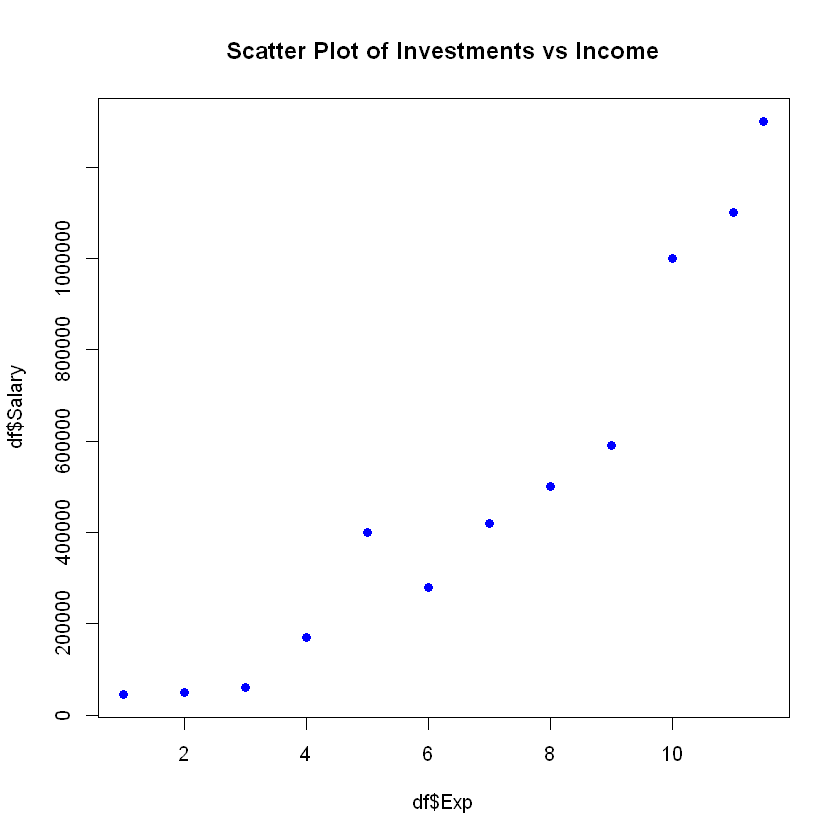

In [9]:
# οπτικοποίηση δεδομένων με scatterplot
plot(df$Exp, df$Salary, 
     main = "Scatter Plot of Investments vs Income", 
     col = "blue", 
     pch = 16)

In [10]:
# εγκατάσταση πακέτου caret σε περίπτωση που δεν είναι ήση εγκατεστημένο στο σύστημα
install.packages("caret")

library(caret)

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\varvo\AppData\Local\Temp\RtmpE7e8NE\downloaded_packages


Loading required package: ggplot2

Loading required package: lattice



In [11]:
# με την εντολή set.seed(77) διασφαλίζεται πως κάθε φορά που εκτελείται αυτό το μπλοκ κώδικα, οι ίδιες εγγραφές καταλήγουν στο Σύνολο Εκπαίδευσης
set.seed(77)

# Define the proportion of data to be used for training
train_proportion <- 0.75

# Create a vector of row indices for the training set
train_indices <- sample(1:nrow(df), size = round(train_proportion * nrow(df)))

# Split the data into training and testing sets
train_set <- df[train_indices, ]
test_set <- df[-train_indices, ]

In [14]:
# Ορισμός και εκπαίδευση του μοντέλου
model <- lm(Salary ~ Exp, data=train_set)

In [15]:
coefficients <- coef(model)
intercept <- coefficients[1]
coef <- coefficients[-1]

In [16]:
summary(model)


Call:
lm(formula = Salary ~ Exp, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-169333 -109000   -8333  101333  125500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -277167      96437  -2.874   0.0239 *  
Exp           115167      13777   8.360 6.88e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 123200 on 7 degrees of freedom
Multiple R-squared:  0.909,	Adjusted R-squared:  0.8959 
F-statistic: 69.88 on 1 and 7 DF,  p-value: 6.877e-05


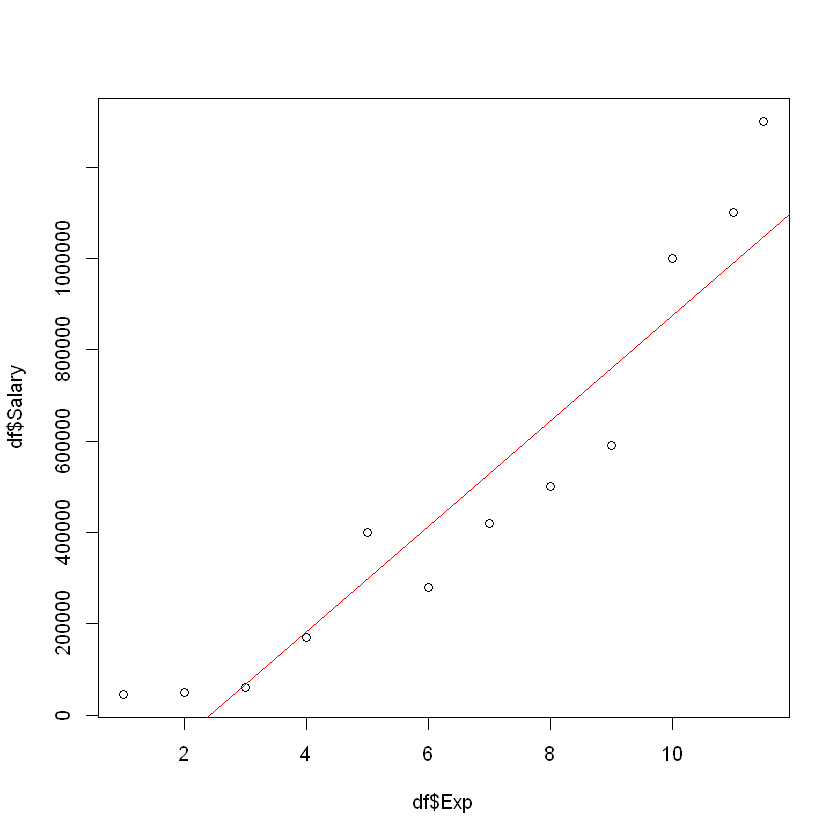

In [17]:
plot(df$Exp, df$Salary)

abline(model,col='red')

In [18]:
predictions <- data.frame(predict(model, newdata=test_set))

In [19]:
print(test_set)

    Exp  Salary
1   1.0   45000
8   8.0  500000
12 11.5 1300000


In [20]:
r_squared_test <- R2(predictions, test_set$Salary)

In [21]:
r_squared_test

predict.model..newdata...test_set.
0.8840099
